### This notebook goes over the fundamentals of Python arrays, specifically Numerical Python N-D Arrays (NumPy arrays).
#### Portions of this notebook were adapted from lessons and images in the [NumPy: the absolute basics for beginners tutorial](https://numpy.org/devdocs/user/absolute_beginners.html) on numpy.org. Users should refer to the tutorial linked above for more in-depth lessons. The bare minimum that is needed to understand course material is presented here.

__Author__: Dr. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu.

### You should be __entering__ this lesson with ...
* Having completely worked through `hello_world.ipynb` and `Fundamentals_ControlFlow_Funtions.ipynb` 
* Knowledge of the fundamentals of the structure of a Jupyter notebook. 
* Knowledge of Python fundamentals including syntax, variable assignemnt, data types, indexing, arthmetic, control flow, and functions.
* Knowledge of how to use git status, git commit, git push.

### You should be __leaving__ this lesson with ...
* An understanding of what an array is in Python.
* An understanding of how to create arrays, index arrays, and apply operations across arrays (arithmetic with multiple arrays + broadcasting arrays using scalar values).
* Basic arithmetic and array operations 
* How to write basic mathematical equations using NumPy.
* A newly created numpy array saved out as a .csv file with Philadelphia Hourly temperatures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

### In previous lessons in this unit we encountered many different data types within the Python programming language. Some of these data types included __containers__, i.e., data structures that could hold a number be elements at the same time.

### <span style="color:red"> What data types have we worked with that you could classify as being containers? Which of them are __ordered__ ? Put your answer in the cell below.

Tuple (), lists [], and dictionaries{}. Tuples are immutable. Lists are mutable. Dictionaries have keys (associations). 

### All of the examples of data types that we would consider __containers__ so far, the elements inside of the containers are allowed to be of _any data type_ and can have __multiple data types__. For example:

In [3]:
colleges={"2016-2018":"Alabama",
          "2019":"Oklahoma"}

In [4]:
qb_stats = ['Jalen Hurts', 1, colleges, 1.85]

In [5]:
qb_stats

['Jalen Hurts', 1, {'2016-2018': 'Alabama', '2019': 'Oklahoma'}, 1.85]

In [6]:
type(qb_stats)

list

In [7]:
type(qb_stats[0]), type(qb_stats[1]), type(qb_stats[2]), type(qb_stats[3])

(str, int, dict, float)

In [8]:
for x in qb_stats:
    dtype = type(x)
    print(dtype), print(x)

<class 'str'>
Jalen Hurts
<class 'int'>
1
<class 'dict'>
{'2016-2018': 'Alabama', '2019': 'Oklahoma'}
<class 'float'>
1.85


### An array is also an ordered container, but it is fundamentally different from `lists`, `dicts`, and `tuples`, in that every single element inside of the array has to be of the __same data type__. You can have an array that contains only floats, ints, or only any other Python data type, but you cannot mix and match! 

### This requirement is very powerful, because it means that we can perform operations across all the elements of the array without running into errors (if we are of course using an appropriate operation). Arrays are not built in data structures, so we must import specific python packages to create and work with them.

### One of the most common Array structures you will work with in Python when performing numerical calculations or working with numerical data is a __NumPy Array, or a "N-dimensional array". We work with NumPy arrays by importing and calling the __Numerical Python (NumPy)__ package. Recall that we imported this package as np at the start of this notebook.

### From [the Numpy user guide](https://numpy.org/doc/stable/user/absolute_beginners.html):
"NumPy (Numerical Python) is an open source Python library that’s __used in almost every field of science and engineering__. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages."

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1200px-NumPy_logo_2020.svg.png)

### Is your head spinning with "n-dimensional array" ??? IT'S OKAY, STAY WITH ME!
### A N-dimensional array is simply an array with __any number__ of dimensions.

#### You can think about a ndarray (n-dimensional array) as a __grid__ of information. The information in this __grid__ can be accessed via indexing and slicing, just like the `lists` that we encountered earlier.

### The image below shows arrays visualized as __grids__: 
* #### A __1D array__: information only 1 dimension. You will hear 1D arrays referred to as __vectors__. _(in more advanced courses)_
Example: change in temperature over time (a "__timeseries__") where the only dimension (axis) of the array is time.
* #### A __2D array__: information in 2 dimensions. You will hear 2D arrays referred to as __matrices__. _(in more advanced courses)_
Example: a map of sea surface temperature, where the dimensions (axes) of the array are latitude x longitude.
* #### A __3D array__: information in 3 dimensions. You will hear 2D arrays referred to as __tensors__. _(in more advanced courses)_
Example: global ocean temperature dataset, where the dimensions (axes) of the array are latitude x longitude x ocean depth. 
Now if we our global ocean temperature dataset was changing with __time__, our dimensions (axes) would be latitude x longitude x ocean depth x time. This would be a __4D array__.

### The analysis of observational datasets and climate model results requires the ability to work with numerical data stored in 1D to 4D arrays.


![](https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays.png)

![](https://cac.cornell.edu/myers/teaching/ComputationalMethods/python/anatomyarray.png)

### Lets start with a simple 1D array (vector). We can create any 1D np.ndarray using the following syntax:
* ### array_variable = np.array([element1,element2, .... element n])

In [9]:
array1d = np.array([1,2,3]) # create a variable called array1d equal to a numpy array with the contents ([])

![](https://numpy.org/devdocs/_images/np_array.png)

### Now printing out the data type (shown using two different methods below) shows us that this new variable we created is a numpy.ndarray:

In [10]:
### the \ symbol allows us to break the line and continue it below.
type(array1d),
array1d.dtype

dtype('int64')

### We can use the `.shape` and `.ndim`, methods to print out the shape of the array and the number of dimensions in the array:
* ### `.shape:` the number of elements along __each axis__. 
The results are returned as (#of elements along axis 0, # of elements along axis 1, ... # of elements along axis n). See the example in the "anatomy of an array" diagram above. The array has a shape of 8 elements along axis 0, and 3 along axis 1, returning a shape of (8,3). 
* ### `.dims:` the number of dimensions in the array. 
A 1D array will return a result of 1, a 2D array will return a result of 2, and nD array will return a result of n.

### The result of applying these methods to our array1d below shows us that this is a 1D array with 3 elements along its first axis [0].

In [11]:
array1d

array([1, 2, 3])

In [12]:
array1d.shape

(3,)

In [13]:
array1d.ndim

1

### Numpy has methods of `.ones()`, `.zeros()` , and `random.rand()` that creates an array filled with ones, zeros, or random numbers of a user specified shape. This functionality can be useful in certain applications, we will use it here to create ndarrays of various shapes in the examples below:

In [14]:
arrayones_1d = np.ones(5)  # a 1D array, with 5 elements over the first dimension
arrayones_1d

array([1., 1., 1., 1., 1.])

In [15]:
arrayzeros_1d = np.zeros(5)  # a 1D array, with 5 elements over the first dimension
arrayzeros_1d

array([0., 0., 0., 0., 0.])

In [16]:
arrayzeros_1d = np.random.rand(5)  # a 1D array, with 5 elements over the first dimension
arrayzeros_1d

array([0.07280516, 0.42638981, 0.96629057, 0.10561305, 0.32024294])

### What if we wanted to create a 2D array of ones, zeros, or random numbers?

In [17]:
arrayones_2d = np.ones([5,5]) ##  # a 2D array, with 5 elements over the first (rows) and second (columns) dimensions
arrayones_2d

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [18]:
arrayzeros_2d = np.zeros([5,5]) ## this is a 5 X 5 array
arrayzeros_2d

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
arrayrandom_2d = np.random.rand(5,5) ## this is a 5 X 5 array
arrayrandom_2d

array([[0.58435001, 0.03828409, 0.81579993, 0.66264501, 0.44673996],
       [0.28655325, 0.97593346, 0.36627596, 0.55854076, 0.74044678],
       [0.12931835, 0.1316285 , 0.88153158, 0.45110863, 0.12413466],
       [0.95672646, 0.96893174, 0.30138638, 0.61412499, 0.26183197],
       [0.97974669, 0.4205901 , 0.29913099, 0.97084537, 0.50254696]])

### <span style="color:red"> Play around with changing the dimension sizes in the examples above to get a handle on how the arrays change. In the cell below, using np.ones and np.zeros, create a 2D array with 2 rows and 3 columns.

In [20]:
arraytask = np.ones([2,3])
arraytask

array([[1., 1., 1.],
       [1., 1., 1.]])

### <span style="color:red"> What if we wanted to create a 3D or 4D array of ones or zeros? Use the cells below to do so:

In [21]:
arraytask_3d = np.zeros ([4,4,4])
arraytask_3d

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [22]:
arraytask_4d = np.ones ([2,2,2,2])
arraytask_4d

array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]])

### We can index and slice arrays just like we learned for `lists`. Let's return to the 1D array we created at the start: `array1d`

In [23]:
array1d

array([1, 2, 3])

### <span style="color:red"> How would you extract the first element in array1d? What about the last? What about if we wanted to extract the number2? For practice, for each one, in the cells below, show how you would do it using positive AND negative indexing.

In [24]:
array1d [0]

1

In [25]:
array1d [len (array1d)-1]

3

### <span style="color:red"> How would you extract the first TWO elements in array1d? 

In [26]:
array1d [0:3]

array([1, 2, 3])

### We can visualize this as shown below:

![](https://numpy.org/devdocs/_images/np_indexing.png)

## Basic arithmetic and operations on arrays: 1D

### Arithmetic operators on arrays apply __elementwise__ (i.e., are applied to __element to element__). A new array is created and filled with the result.

In [27]:
arr1 = np.array([10,20,30,40,50])
arr2 = np.array([30,30,30,30,30])

In [28]:
arr1 + arr2   # elementwise addtion of arr1 and arr2: arr1[0] + arr2[0] ... and so on.

array([40, 50, 60, 70, 80])

In [29]:
arr1 - arr2   # elementwise subtraction of arr1 and arr2: arr1[0] - arr2[0] ... and so on.

array([-20, -10,   0,  10,  20])

In [30]:
arr1 * arr2     # elementwise product of arr1 and arr2: arr1[0] * arr2[0] ... and so on.

array([ 300,  600,  900, 1200, 1500])

In [31]:
arr1 / arr2     # elementwise floor division of arr1 and arr2: arr1[0] / arr2[0] ... and so on.

array([0.33333333, 0.66666667, 1.        , 1.33333333, 1.66666667])

In [32]:
arr2 > arr1   # elementwise boolean operations of arr1 and arr2: arr1[0] > arr2[0] ... and so on.

array([ True,  True, False, False, False])

In [33]:
arr1 ** arr2  # elementwise exponentiation .... element of arr1 raise to the power of the element of arr1: arr1[0] ** arr2[0] ... and so on.

array([ 5076944270305263616, -8070450532247928832,  2565992168703393792,
                          0,  5878960461428293632])

### Elementwise arithmetic is visualized in the graphics below:

![](https://numpy.org/doc/stable/_images/np_array_dataones.png)
![](https://numpy.org/doc/stable/_images/np_data_plus_ones.png)
![](https://numpy.org/doc/stable/_images/np_sub_mult_divide.png)

### You can perform basic operations to elements within a single array or over a single axis of a multi-dimensional array:

#### The following methods return a single (scalar) value:
* `.sum()` : find the sum of the elements in an array (i.e., arr[0] + arr[1] + .... arr[n])
* `.mean()` : fine the arithmetic mean (average) of the elements in the array (i.e., (arr[0] + arr[1] + .... arr[n]) / n number of elements)
* `.std()` : fine the standard deviation the elemnts in the array.
* `.min()` : find the element of the minimum (lowest) value in the array.
* `.max()` : find the element of the maximum (greatest) value in the array.

#### The following methods return an array with the resulting values:
* `np.square(array)`: square all elements within the array, return array with squared values.
* `np.sqrt(array)`: square root all elements within the array, return array with the square root of values.
* `np.cos(array)`: apply cosine to all elements within the array, return array with the computed values.
* `np.sin(array)`: apply sine to all elements within the array, return array with the computed values.

In [34]:
arr1.sum()

150

In [35]:
arr1.mean()

30.0

In [36]:
np.square(arr1)

array([ 100,  400,  900, 1600, 2500])

In [37]:
np.sqrt(arr2)

array([5.47722558, 5.47722558, 5.47722558, 5.47722558, 5.47722558])

![](https://numpy.org/doc/stable/_images/np_aggregation.png)

### <span style="color:red"> In the cells below, create a 1D array and practice using the `.sum()`, `.mean()`, `.std()`, `.min()`, `.max()`. Make sure you have a cell for each operation and display the output. Discuss any challenges in your understanding with those around you.

In [38]:
array_practice = np.random.rand (5,5)
array_practice

array([[0.47571826, 0.64623083, 0.36285197, 0.05708546, 0.27992261],
       [0.48808286, 0.96096868, 0.11437963, 0.8457716 , 0.78356935],
       [0.8995082 , 0.05048089, 0.31613592, 0.74877831, 0.85558877],
       [0.10946787, 0.82366925, 0.29339991, 0.15522841, 0.4956113 ],
       [0.92864813, 0.38870897, 0.19359702, 0.75875645, 0.63122837]])

In [39]:
array_practice.std()

0.29815929351241466

In [40]:
array_practice.min()

0.05048088581513954

In [41]:
array_practice.max()

0.9609686786497778

In [42]:
array_practice.sum()

12.663389001546074

In [43]:
array_practice.mean()

0.506535560061843

### <span style="color:red"> In the cells below, create a 1D array and practice using the `np.square(array)`, `np.sqrt(array)`, `np.cos(array)`, `np.sin(array)`. Make sure you have a cell for each operation and display the output. Discuss any challenges in your understanding with those around you.

In [44]:
np.square(array_practice)

array([[0.22630786, 0.41761429, 0.13166155, 0.00325875, 0.07835667],
       [0.23822488, 0.9234608 , 0.0130827 , 0.7153296 , 0.61398093],
       [0.809115  , 0.00254832, 0.09994192, 0.56066895, 0.73203215],
       [0.01198321, 0.67843103, 0.08608351, 0.02409586, 0.24563056],
       [0.86238734, 0.15109466, 0.03747981, 0.57571135, 0.39844926]])

In [45]:
np.sqrt(array_practice)

array([[0.68972332, 0.80388484, 0.60237195, 0.23892563, 0.52907713],
       [0.69862927, 0.9802901 , 0.33820058, 0.91965841, 0.88519453],
       [0.94842406, 0.22467952, 0.56225965, 0.86531977, 0.92498042],
       [0.33085929, 0.90756225, 0.54166402, 0.39399037, 0.70399666],
       [0.96366391, 0.62346529, 0.43999661, 0.87106627, 0.79449882]])

In [46]:
np.cos(array_practice)

array([[0.88896401, 0.79835919, 0.93488834, 0.99837107, 0.96107682],
       [0.88323349, 0.57272618, 0.99346578, 0.66315395, 0.70839876],
       [0.62199513, 0.99872611, 0.95044384, 0.73252108, 0.65577413],
       [0.99401437, 0.67953387, 0.95726613, 0.98797624, 0.87967816],
       [0.59891713, 0.92539912, 0.98131855, 0.72569216, 0.80730321]])

In [47]:
np.sin(array_practice)

array([[0.45797707, 0.60218154, 0.35494195, 0.05705446, 0.27628127],
       [0.46893347, 0.81974674, 0.1141304 , 0.74848302, 0.70581243],
       [0.78302111, 0.05045945, 0.3108963 , 0.68074435, 0.75495715],
       [0.10924937, 0.73364414, 0.28920851, 0.15460577, 0.47556948],
       [0.80081101, 0.37899401, 0.19238995, 0.68801954, 0.59013687]])

## Broadcasting: carrying out an operation between __an array and a single number__ (scalar). NumPy understands that the operation must be done __for each cell__.

### Say you have an array that contains data regarding distance in miles, but you wish to convert this data into km for your calculation: 
* 1 mile = 1.6 km.

In [48]:
data_in_miles = np.array([1.0, 2.0])
data_in_km = data_in_miles*1.6
data_in_km

array([1.6, 3.2])

![](https://numpy.org/doc/stable/_images/np_multiply_broadcasting.png)

### <span style="color:red"> In the cells below: 
### <span style="color:red">  1. Create a 1D array of yesterdays hourly temperatures in Philadelphia which you can find using __this [link](https://weather.com/weather/hourbyhour/l/Philadelphia+PA?canonicalCityId=aa0f46aff5c7ee96eb5fdea10c53c77c9578eb071854d7f04ae0a7aa517772ab)__: 
### <span style="color:red">  2. Print out the shape of your array. How many elements does your array contain?
### <span style="color:red">  3.  Compute the max, min, average, and standard deviation of the temperatures.
### <span style="color:red">  4.  Create new array that contains all the values in the array to converted to degrees Celcius.
### <span style="color:red">  5.  Create new array that contains all the values in the array to converted to Kelvin.

In [49]:
tempsF = np.array([86,88,89,90,92,99,96,94,92])
tempsF

array([86, 88, 89, 90, 92, 99, 96, 94, 92])

In [50]:
tempsF.shape

(9,)

In [51]:
np.min(tempsF)

86

In [52]:
np.max(tempsF)

99

In [53]:
np.mean(tempsF)

91.77777777777777

In [54]:
np.std(tempsF)

3.852207960746604

In [55]:
tempsC = (tempsF-32)*(5/9)
tempsC

array([30.        , 31.11111111, 31.66666667, 32.22222222, 33.33333333,
       37.22222222, 35.55555556, 34.44444444, 33.33333333])

In [56]:
tempsK = (tempsC+273.15)
tempsK

array([303.15      , 304.26111111, 304.81666667, 305.37222222,
       306.48333333, 310.37222222, 308.70555556, 307.59444444,
       306.48333333])

## Working with 2D arrays (matrices) [We won't go into the creation of 3D arrays (tensors) for our purposes, but the same methods apply]

### You were briefly introduced to the creation of > 1D arrays earlier in this lesson when you were challenged with creating them using the `.ones()`, `.zeros()`, and `.random.rand()`. How would we create one with user-defined values? We can pass Python "lists of lists":
* #### The first axis (axis 0) of our array (ROWS) contains the elements inside the "outer most" brackets.
* #### The second axis (axis 1) of our array (COLUMNS) contains the elements inside of the inner most brackets.

In [57]:
array2d = np.array([[1, 2], [3, 4], [5, 6]])
array2d

array([[1, 2],
       [3, 4],
       [5, 6]])

![](https://numpy.org/devdocs/_images/np_create_matrix.png)

### <span style="color:red"> How many elements does the first axis (axis 0) contain?

3 rows

### <span style="color:red"> How many elements does the second axis (axis 1) contain?

2 columns

### <span style="color:red"> Based on your assessment above. What will be the result of the `.shape` and `.ndim` methods? Explain your results to the person next to you.

The shape tells you that the array has 3 rows and 2 columns. The array has 2 dimensions/axes.

In [58]:
array2d.shape

(3, 2)

In [59]:
array2d.ndim

2

### How do we __index__ if the array is greater than 1D ? The following array is the 2D array shown visually as blue shaded blocks in the image a few cells above.

In [60]:
array2d

array([[1, 2],
       [3, 4],
       [5, 6]])

In [61]:
array2d[0,0]

1

### If we want to selected a specific element of a 2D array, we use the following syntax which identifies the location (index) of the element as [row location,column location]. Multidimensional arrays can have one index per axis.
* ### element = array[row_index,column_index]
* ### The numerical value of 1 in our array2d is located at row 0, column 0:

In [62]:
array2d[0,0]

1

### The number 5 in our array2d is located at row 2, column 0:

In [63]:
array2d[2,0]

5

### <span style="color:red"> Write code in the cell below that extracts the number 4 from our array2d. Explain your thought process to the person next to you.

The number 4 is in row 1 (second row) and in column 1 (second column).

In [64]:
array2d[1,1]

4

### <span style="color:red"> Write code in the cell below that extracts the number 2 from our array2d. Explain your thought process to the person next to you.

In [65]:
array2d[0,1]

2

In [66]:
array2d

array([[1, 2],
       [3, 4],
       [5, 6]])

In [67]:
array2d[0:3, 1]  # extract each row 0 --> 2 in the second column (column 1) of  our array, array2d.

array([2, 4, 6])

### <span style="color:red"> In the code above, why did we have to specify 0:3 and NOT 0:2 to extract what we needed? What happens when you change it to 0:2? Why doesn't this work?

Because it includes up to the last specified data point, it does not actually include it. It doesn't work because then it will not be including what we want to extract.

#### In the code below, the `:` translates to __extract ALL of the elements in each row__ and is equivalent to the example above where we specified 0:3:

In [68]:
array2d[:, 1]    # This is equivalent to the previous example, the `:` translates to `extract ALL of the elements in each row`

array([2, 4, 6])

## Writing mathematical equations with NumPy. The ease of implementing mathematical formulas that work on arrays is one of the things that make NumPy so widely used in the scientific Python community. Let's work through some examples.

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*NoYRMhNKhmgC9fRossUXsA.png)

### Translating the equation above into NumPy syntax would yield:
#### In words: "The __mean__ is equation to the sum of all of the elements in the array divided by the number of elements in the array"

## `mean = np.sum(arr) / np.size`

### Apply this to our array, arr1:

In [69]:
mean = arr1.sum() / arr1.size  ### .size returns the size, i.e., the number of elements in a array
mean

30.0

### Confirm that our value returned matches that from just using the `.mean()` method itself:

In [70]:
arr1.mean()

30.0

### <span style="color:red"> In the cells below, translate the equation (sigma) for standard deviation into NumPy syntax and use it to compute the standard deviation of arr1. Confirm that your equation returns the same value as using the `.std()` method itself. Be careful of your parentheses!!

![](https://www.gstatic.com/education/formulas2/553212783/en/population_standard_deviation.svg)

* ### sigma = population standard deviation
* ### N = the size of the population
* ### x_i = each value from the population (your elements)
* ### u = the population mean

In [71]:
stan_d = np.sqrt((np.sum(np.square((arr1)-(arr1.mean()))))/arr1.size)
stan_d

14.142135623730951

### <span style="color:red"> Confirm that our value returned matches that from just using the `.mean()` method itself:

In [72]:
np.std(arr1)

14.142135623730951

### <span style="color:red"> Comprehension Check! Use the space below to write a function that takes in a 1D array as an arugment and returns the mean and standard deviation. Use the two equations for mean and standard deviation that you just worked out above. Revisit your Fundamentals_ControlFlow notebook to refresh yourself on functions.

In [74]:
practice = np.array([5, 39, 2, 14, 32, 9, 28, 2, 17])

In [84]:
def func (array):
    avg = array.sum() / array.size
    standard_dev = np.sqrt((np.sum(np.square((array)-(array.mean()))))/array.size)
    return avg, standard_dev
    

In [83]:
func(practice)

(16.444444444444443, 12.885056901621532)

### <span style="color:red"> Send your array of hourly temperatures in Philadelphia through your function to compute the mean and standard deviation.

In [81]:
func(tempsF)

(91.77777777777777, 3.852207960746604)

### There will likely come a time were you want to save your NumPy arrays and load them back in, so you do not have to re-run your code all the time.
### You can save a NumPy array as a plain text file like a `.csv` or `.txt` file with np.savetxt:
* csv_arr = your_numpy_array   : define a new variable called csv_arr set equal to the numpy array you want to save
* np.savetxt('name_of_file_to_be_saved.csv', csv_arr) : use np.savetxt to save your file with a user-designated name with .csv or .txt, csv_arr variable defined above.
* np.loadtxt('name_of_file_defined_above')

### Example:
####  `csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])` 
#### `np.savetxt('new_file.csv', csv_arr)`
#### `np.loadtxt('new_file.csv')`


### <span style="color:red"> Following the example above, save your array Philadelphia hourly temperatures as a .csv file titled `Philly_Temps_[putdatehere].csv` and load it back into your Jupyter Notebook book and show the contents to confirm this was done correctly. You should see a .csv file appear in your directory on the left hand side of your screen.

In [86]:
csv_arr = tempsF
np.savetxt('Philly_Temps.csv', csv_arr)
np.loadtxt('Philly_Temps.csv')

array([86., 88., 89., 90., 92., 99., 96., 94., 92.])

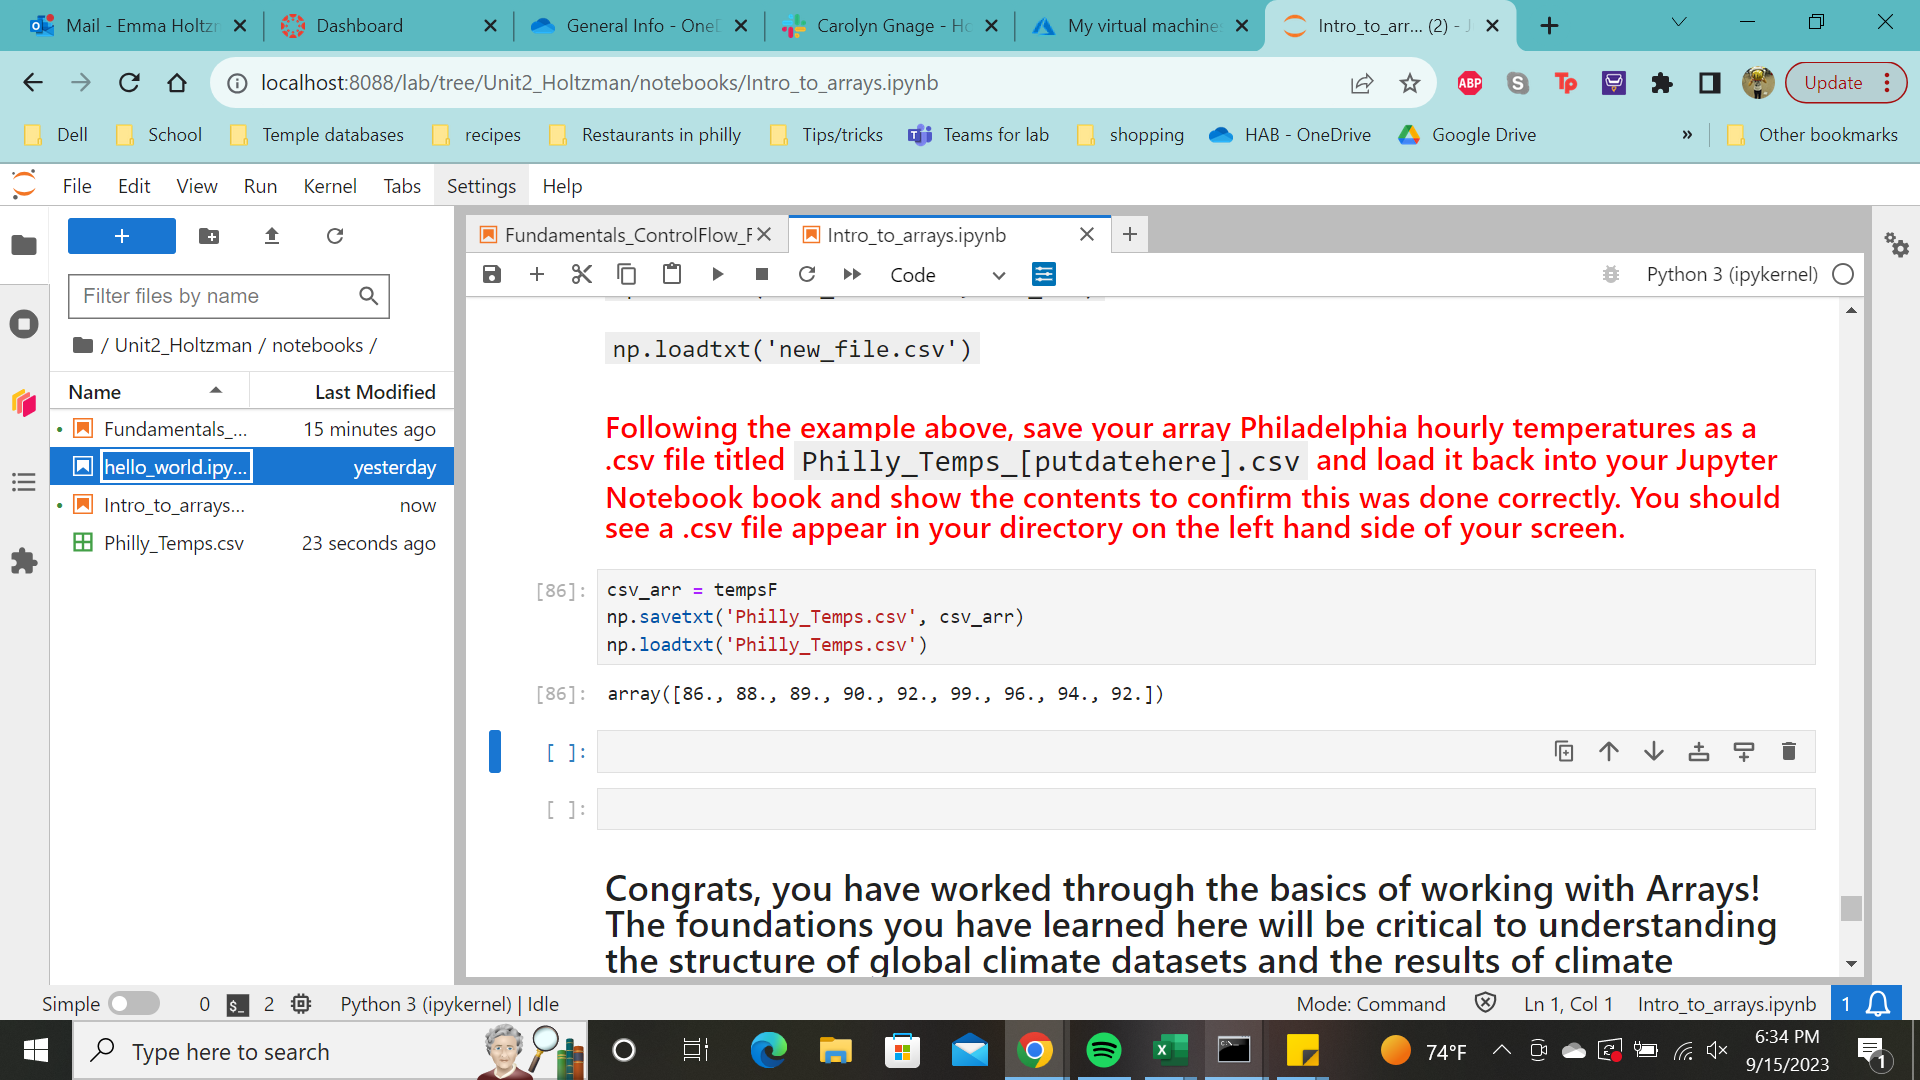

## Congrats, you have worked through the basics of working with Arrays! The foundations you have learned here will be critical to understanding the structure of global climate datasets and the results of climate simulations. If you are having trouble grasping these concepts, please review this notebook again and / or come in for office hours or find peers in the class to work with.

## We will apply the concepts used here work with and visualize observations of greenhouse gas concentrations using __Pandas__ next class.

## After completing all the excercises outlined in red throughout this notebook, add both your Jupyter Notebook (this file!) and your .csv to your git, commit your changes, and push these back to your GitHub. Confirm you see these in your GitHub BEFORE leaving class.

### Shutting down your notebook (don't do this yet!! These are just instructions for when class is over).
### Before shutting down, save your notebook with the disc icon in the Notebook toolbar. Go to the the File menu and click Shut Down to close the browser table and Jupyter Lab itself.